## **Explore Data**

In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation
import numpy as np   # For numerical computations
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score  # For model training and evaluation
from sklearn.preprocessing import StandardScaler  # For feature scaling
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # For classification models
from xgboost import XGBClassifier  # For XGBoost classification
from sklearn.linear_model import LogisticRegression  # For creating and training a Logistic Regression model
from sklearn.metrics import classification_report, accuracy_score  # For model evaluation
import pickle  # For saving and loading models
import seaborn as sns  # Import seaborn library for data visualization
import matplotlib.pyplot as plt  # For plotting
from IPython.display import FileLink  # For creating file links
import shutil  # For file operations

In [2]:
# Load dataset from CSV file into a DataFrame
data = pd.read_csv('data_1D.csv')

In [3]:
# Display the first few rows of the dataset
data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


In [4]:
# Check the number of rows and columns in the dataset
data.shape

(8238, 17)

- Untuk angka pertama, yaitu 8238, mengindikasikan jumlah baris dalam dataset.
- Untuk angka kedua, yaitu 17, menandakan jumlah kolom atau fitur yang ada dalam dataset.

In [5]:
# Print the column names of the dataset
data.columns

Index(['Unnamed: 0', 'age', 'job', 'marital', 'education', 'default',
       'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration',
       'campaign', 'pdays', 'previous', 'poutcome', 'y'],
      dtype='object')

Output di atas menunjukkan daftar nama-nama kolom dalam dataset. Setiap nama kolom mewakili satu fitur atau atribut dalam dataset.

In [6]:
# Display concise summary information about the DataFrame, including data types and non-null values count
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8238 entries, 0 to 8237
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   8238 non-null   int64  
 1   age          8238 non-null   int64  
 2   job          8230 non-null   object 
 3   marital      8238 non-null   object 
 4   education    8238 non-null   object 
 5   default      8238 non-null   object 
 6   housing      8238 non-null   object 
 7   loan         8238 non-null   object 
 8   contact      8238 non-null   object 
 9   month        8238 non-null   object 
 10  day_of_week  8238 non-null   object 
 11  duration     8226 non-null   float64
 12  campaign     8238 non-null   int64  
 13  pdays        8238 non-null   int64  
 14  previous     8238 non-null   int64  
 15  poutcome     8238 non-null   object 
 16  y            8238 non-null   object 
dtypes: float64(1), int64(5), object(11)
memory usage: 1.1+ MB


Output di atas menunjukkan informasi rinci tentang dataset dalam format DataFrame. Berikut adalah penjelasan detailnya:

- RangeIndex: Menunjukkan bahwa indeks dataset memiliki rentang dari 0 hingga 8237, dengan total 8238 entri atau baris data.
- Data columns: Menyajikan informasi tentang kolom-kolom dalam dataset beserta jumlah non-null values dan tipe data (Dtype) dari setiap kolom.
Total columns (total 17 columns): Mengindikasikan bahwa dataset memiliki total 17 kolom.

Setiap baris pada bagian "Data columns" memberikan informasi tentang kolom-kolom dalam dataset, yang meliputi:
- Column: Nama kolom atau fitur dalam dataset.
- Non-Null Count: Jumlah nilai non-null atau tidak kosong dalam kolom tersebut. Misalnya, kolom 'job' memiliki 8230 nilai non-null, artinya ada 8 nilai yang kosong dalam kolom tersebut.
- Dtype: Tipe data dari nilai-nilai dalam kolom tersebut, seperti float64 (untuk bilangan desimal), int64 (untuk bilangan bulat), atau object (untuk tipe data string atau kategori).

Selanjutnya, di bagian bawah, terdapat informasi tambahan tentang dataset, termasuk:
- Memory usage: Menunjukkan penggunaan memori yang diperlukan oleh dataset. Dalam hal ini, dataset menggunakan sekitar 1.1+ MB memori.

In [7]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']

# Menggunakan loop untuk menampilkan value counts untuk setiap kolom kategorikal
for column in categorical_columns:
    print(f"Value counts for {column}:")
    print(data[column].value_counts())
    print("\n")  # Mencetak baris kosong untuk pemisah

Value counts for job:
job
admin.           2033
blue-collar      1870
technician       1372
services          822
management        546
retired           366
entrepreneur      294
self-employed     263
housemaid         219
unemployed        196
student           184
unknown            65
Name: count, dtype: int64


Value counts for marital:
marital
married     4994
single      2338
divorced     892
unknown       14
Name: count, dtype: int64


Value counts for education:
education
university.degree      2379
high.school            1915
basic.9y               1243
professional.course    1043
basic.4y                817
basic.6y                486
unknown                 349
illiterate                6
Name: count, dtype: int64


Value counts for default:
default
no         6491
unknown    1747
Name: count, dtype: int64


Value counts for housing:
housing
yes        4284
no         3749
unknown     205
Name: count, dtype: int64


Value counts for loan:
loan
no         6741
yes        129

Setiap baris pada bagian "Value counts for ..." memberikan informasi tentang kolom-kolom dalam dataset, yang meliputi:

- Kolom: Nama kolom atau fitur dalam dataset.
- Nilai: Masing-masing nilai yang ada dalam kolom tersebut.
- Frekuensi: Jumlah kemunculan nilai tersebut dalam kolom.

Informasi ini membantu untuk memahami distribusi dari nilai-nilai kategorikal dalam dataset.

## **Data Preprocessing**

In [8]:
# Drop unnecessary columns
data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [9]:
# Display the first few rows of the dataset after drop
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,83,retired,divorced,basic.4y,no,no,no,cellular,nov,tue,242.0,1,3,3,success,yes
1,32,services,married,high.school,no,no,no,telephone,may,tue,190.0,3,999,0,nonexistent,no
2,31,admin.,single,university.degree,no,yes,no,telephone,may,wed,325.0,2,999,0,nonexistent,no
3,33,admin.,single,university.degree,no,yes,no,telephone,aug,thu,158.0,1,999,0,nonexistent,no
4,39,services,married,high.school,no,yes,no,telephone,jul,mon,158.0,1,999,0,nonexistent,no


Variabel yang tidak berpengaruh terhadap model:

- Unnamed: 0 -> Variabel ini tampaknya merupakan indeks dari DataFrame yang mungkin secara tidak sengaja tersimpan saat data di-export ke CSV. Variabel ini tidak memiliki nilai prediktif dan sebaiknya dihapus.


In [10]:
# Check the number of rows and columns in the dataset after dropping columns
data.shape

(8238, 16)

Output di atas menunjukkan penghapusan (drop) terhadap beberapa kolom telah berhasil dilakukan sehingga jumlah baris dan kolom dalam dataset seudah berubah menjadi 16. Kolom yang dihapus tidak mempengaruhi hasil prediksi.





##### **Pisahkan Target**

In [11]:
# Separate Features and Target
X = data.drop(['y'], axis=1)  # Features other than the target
y = data['y']  # Target

##### **Split Train dan Test**

In [12]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##### **Check Missing Values di Data Training dan Testing**

In [13]:
# Check for missing values in the training data
missing_values_train = X_train.isnull().sum()

# Check for missing values in the testing data
missing_values_test = X_test.isnull().sum()

print("Missing values in the training data:")
print(missing_values_train)

print("\nMissing values in the testing data:")
print(missing_values_test)

Missing values in the training data:
age            0
job            5
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       9
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

Missing values in the testing data:
age            0
job            3
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       3
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


Output di atas menunjukkan adanya jumlah nilai yang hilang (missing values) dalam data training dan data testing dalam kolom  'job' dan 'duration', dimana 'job' merupakan data categorical sehingga untuk penanganannya akan menggunakan nilai modus untuk mengisi nilai yang hilang (missing values), sedangkan 'duration' merupakan data numeric sehingga penanganannya akan menggunakan nilai median atau mean untuk mengisi nilai yang hilang (missing values) dilihat berdasarkan adanya outliers atau tidak.

##### **Check Outliers**

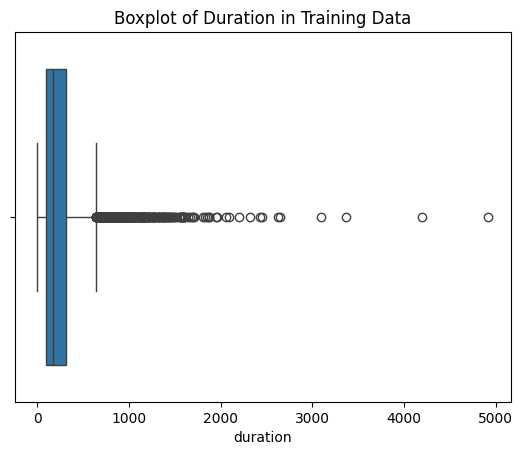

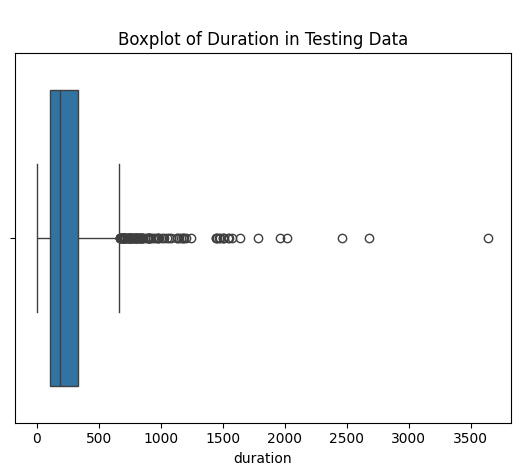

In [14]:
# Check outliers for the 'Duration' column in the training data
sns.boxplot(x=X_train['duration'])
plt.title('Boxplot of Duration in Training Data')
plt.show()

# Check outliers for the 'Duration' column in the testing data
sns.boxplot(x=X_test['duration'])
plt.title('\nBoxplot of Duration in Testing Data')
plt.show()

Output di atas menunjukkan adanya outliers dalam data training dan data testing dalam kolom  'duration', sehingga untuk penanganannya akan menggunakan nilai median untuk mengisi nilai yang hilang (missing values).

##### **Handling Missing Values**

**Categorical**

In [15]:
# Find the mode of the 'Job' column
modus_job = X_train['job'].mode()[0]
print("Modus Job:", modus_job)

Modus Job: admin.


In [16]:
# Fill missing values with the median for training, testing, and validation data
X_train['job'].fillna('admin.', inplace=True)
X_test['job'].fillna('admin.', inplace=True)

**Numerical**

In [17]:
# Find the median of the 'Duration' column
print("Median Duration:", np.nanmedian(X_train['duration']))

Median Duration: 179.0


In [18]:
# Fill missing values with the median for training, testing, and validation data
X_train['duration'].fillna(179.0, inplace=True)
X_test['duration'].fillna(179.0, inplace=True)

**Recheck Missing Values**

In [19]:
# Recheck missing values in the training data
missing_values_train = X_train.isnull().sum()

# Recheck missing values in the testing data
missing_values_test = X_test.isnull().sum()

print("Missing values in the training data:")
print(missing_values_train)

print("\nMissing values in the testing data:")
print(missing_values_test)

Missing values in the training data:
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64

Missing values in the testing data:
age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
dtype: int64


In [20]:
# Recheck training and testing data
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6590 entries, 3805 to 7270
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          6590 non-null   int64  
 1   job          6590 non-null   object 
 2   marital      6590 non-null   object 
 3   education    6590 non-null   object 
 4   default      6590 non-null   object 
 5   housing      6590 non-null   object 
 6   loan         6590 non-null   object 
 7   contact      6590 non-null   object 
 8   month        6590 non-null   object 
 9   day_of_week  6590 non-null   object 
 10  duration     6590 non-null   float64
 11  campaign     6590 non-null   int64  
 12  pdays        6590 non-null   int64  
 13  previous     6590 non-null   int64  
 14  poutcome     6590 non-null   object 
dtypes: float64(1), int64(4), object(10)
memory usage: 823.8+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1648 entries, 706 to 2131
Data columns (total 15 columns):
 #   Column 

Output di atas menunjukkan hasil pengecekan kembali jumlah nilai yang hilang setelah dilakukan pengisian nilai yang hilang (fillna) dalam data training dan data testing.

## **Feature Engineering**

**Encoding**

Kolom '**job**', '**marital**', '**education**', '**defaul**t', '**housing**', '**loan**','**poutcome**', dan '**contact**' memiliki data type  object yaitu string sehingga perlunya dilakukan one **hot encoding**, sedangkan kolom '**month**', dan '**day_of_week**' akan dilakukan **label ecoding** karena data bersifat ordinal. Proses one-hot encoding penting dilakukan untuk mengubah variabel kategorikal menjadi numerical dalam nilai 0 dan 1, sedangkan label encoding merupakan proses mengubah variabel kategorikal menjadi nilai numerik yang unik untuk setiap kategori dimana setiap kategori dalam kolom diberi label numerik yang unik bisa seperti 1,2, 3 dan lainnya. Ini membantu model pembelajaran mesin dalam memahami dan memproses data, sehingga dapat meningkatkan kinerja dan akurasi model.

**One-Hot Encoding**

In [21]:
# One-Hot Encoding for 'job'
X_train_job = pd.get_dummies(X_train['job'], prefix='Job').astype(int)
X_test_job = pd.get_dummies(X_test['job'], prefix='Job').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('job', axis=1), X_train_job], axis=1)
X_test = pd.concat([X_test.drop('job', axis=1), X_test_job], axis=1)

In [22]:
# One-Hot Encoding for 'marital'
X_train_marital = pd.get_dummies(X_train['marital'], prefix='Marital').astype(int)
X_test_marital = pd.get_dummies(X_test['marital'], prefix='Marital').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('marital', axis=1), X_train_marital], axis=1)
X_test = pd.concat([X_test.drop('marital', axis=1), X_test_marital], axis=1)

In [23]:
# One-Hot Encoding for 'education'
X_train_education = pd.get_dummies(X_train['education'], prefix='Education').astype(int)
X_test_education = pd.get_dummies(X_test['education'], prefix='Education').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('education', axis=1), X_train_education], axis=1)
X_test = pd.concat([X_test.drop('education', axis=1), X_test_education], axis=1)

In [24]:
# One-Hot Encoding for 'default'
X_train_default = pd.get_dummies(X_train['default'], prefix='Default').astype(int)
X_test_default = pd.get_dummies(X_test['default'], prefix='Default').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('default', axis=1), X_train_default], axis=1)
X_test = pd.concat([X_test.drop('default', axis=1), X_test_default], axis=1)

In [25]:
# One-Hot Encoding for 'housing'
X_train_housing = pd.get_dummies(X_train['housing'], prefix='Housing').astype(int)
X_test_housing = pd.get_dummies(X_test['housing'], prefix='Housing').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('housing', axis=1), X_train_housing], axis=1)
X_test = pd.concat([X_test.drop('housing', axis=1), X_test_housing], axis=1)


In [26]:
# One-Hot Encoding for 'loan'
X_train_loan = pd.get_dummies(X_train['loan'], prefix='Loan').astype(int)
X_test_loan = pd.get_dummies(X_test['loan'], prefix='Loan').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('loan', axis=1), X_train_loan], axis=1)
X_test = pd.concat([X_test.drop('loan', axis=1), X_test_loan], axis=1)

In [27]:
# One-Hot Encoding for 'poutcome'
X_train_poutcome = pd.get_dummies(X_train['poutcome'], prefix='Poutcome').astype(int)
X_test_poutcome = pd.get_dummies(X_test['poutcome'], prefix='poutcome').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('poutcome', axis=1), X_train_poutcome], axis=1)
X_test = pd.concat([X_test.drop('poutcome', axis=1), X_test_poutcome], axis=1)

In [28]:
# One-Hot Encoding for 'contact'
X_train_contact = pd.get_dummies(X_train['contact'], prefix='Contact').astype(int)
X_test_contact = pd.get_dummies(X_test['contact'], prefix='Contact').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('contact', axis=1), X_train_contact], axis=1)
X_test = pd.concat([X_test.drop('contact', axis=1), X_test_contact], axis=1)

**Label Encoding**

In [29]:
# Dictionary used for mapping months to numbers
month = {"month": {"mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}}

# Replace the values in the 'month' column with the mapped numerical values
X_train = X_train.replace(month)
X_test = X_test.replace(month)

In [30]:
# Dictionary used for mapping day_of_week to numbers
day_of_week = {"day_of_week": {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5}}

# Replace the values in the 'day_of_week' column with the mapped numerical values
X_train = X_train.replace(day_of_week)
X_test = X_test.replace(day_of_week)

In [31]:
# Display the first few rows of the encoded data
X_train.head()

,age,month,day_of_week,duration,campaign,pdays,previous,Job_admin.,Job_blue-collar,Job_entrepreneur,...,Housing_unknown,Housing_yes,Loan_no,Loan_unknown,Loan_yes,Poutcome_failure,Poutcome_nonexistent,Poutcome_success,Contact_cellular,Contact_telephone
3805,31,6,2,103.0,1,3,2,0,1,0,...,0,1,0,0,1,0,0,1,1,0
5900,32,7,3,183.0,1,999,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
5022,47,8,5,78.0,3,999,0,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4556,36,7,4,10.0,3,999,0,1,0,0,...,0,1,1,0,0,0,1,0,1,0
4139,45,11,3,391.0,2,999,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [32]:
# Display the first few rows of the encoded data
X_test.head()

,age,month,day_of_week,duration,campaign,pdays,previous,Job_admin.,Job_blue-collar,Job_entrepreneur,...,Housing_unknown,Housing_yes,Loan_no,Loan_unknown,Loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,Contact_cellular,Contact_telephone
706,46,5,3,93.0,1,999,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
5968,35,7,2,740.0,1,999,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
1665,24,7,3,242.0,1,999,0,0,0,0,...,0,1,1,0,0,0,1,0,1,0
6676,51,5,2,40.0,4,999,0,1,0,0,...,0,0,1,0,0,0,1,0,1,0
5606,36,7,2,305.0,7,999,0,1,0,0,...,0,1,1,0,0,0,1,0,0,1


One Hot Encoding telah berhasil dilakukan. Setiap baris data pada kolom 'job', 'marital', 'education', 'default', 'housing', 'loan', dan 'poutcome' sudah berubah menjadi nilai 0 atau 1.

## **Standard Scaler untuk Numerical Data**

Kemudian perlunya StandardScaler yang digunakan untuk menormalkan atau standarisasi fitur-fitur numerik dalam sebuah dataset.

In [33]:
# List of numeric columns for scaling
numeric_cols = ['age', 'campaign', 'previous', 'duration', 'pdays']

# Initialize StandardScaler
scaler = StandardScaler()

# Scale training data
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])

# Scale testing data
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [34]:
# Display the first few rows of the scaled data
X_train.head()

,age,month,day_of_week,duration,campaign,pdays,previous,Job_admin.,Job_blue-collar,Job_entrepreneur,...,Housing_unknown,Housing_yes,Loan_no,Loan_unknown,Loan_yes,Poutcome_failure,Poutcome_nonexistent,Poutcome_success,Contact_cellular,Contact_telephone
3805,-0.850592,6,2,-0.578923,-0.556043,-5.525173,3.788273,0,1,0,...,0,1,0,0,1,0,0,1,1,0
5900,-0.755567,7,3,-0.279119,-0.556043,0.181425,-0.332678,0,0,0,...,0,0,0,0,1,0,1,0,1,0
5022,0.669800,8,5,-0.672611,0.149177,0.181425,-0.332678,0,0,0,...,0,1,0,0,1,0,1,0,1,0
4556,-0.375469,7,4,-0.927444,0.149177,0.181425,-0.332678,1,0,0,...,0,1,1,0,0,0,1,0,1,0
4139,0.479751,11,3,0.500369,-0.203433,0.181425,-0.332678,0,0,0,...,0,0,0,0,1,0,1,0,1,0


In [35]:
# Display the first few rows of the scaled data
X_test.head()

,age,month,day_of_week,duration,campaign,pdays,previous,Job_admin.,Job_blue-collar,Job_entrepreneur,...,Housing_unknown,Housing_yes,Loan_no,Loan_unknown,Loan_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,Contact_cellular,Contact_telephone
706,0.574776,5,3,-0.616398,-0.556043,0.181425,-0.332678,1,0,0,...,0,0,1,0,0,0,1,0,0,1
5968,-0.470494,7,2,1.808260,-0.556043,0.181425,-0.332678,0,0,0,...,0,1,1,0,0,0,1,0,1,0
1665,-1.515763,7,3,-0.058015,-0.556043,0.181425,-0.332678,0,0,0,...,0,1,1,0,0,0,1,0,1,0
6676,1.049898,5,2,-0.815018,0.501787,0.181425,-0.332678,1,0,0,...,0,0,1,0,0,0,1,0,1,0
5606,-0.375469,7,2,0.178080,1.559617,0.181425,-0.332678,1,0,0,...,0,1,1,0,0,0,1,0,0,1


Scalling dan Normalisasi telah berhasil dilakukan. Setiap data pada kolom sudah memiliki rentang nilai antara -1 hingga 1 atau -2 hingga 2. Setiap fitur akan memiliki mean 0 dan standar deviasi 1.

In [36]:
# Mengubah nama kolom untuk konsistensi
X_train.columns = [col.lower() for col in X_train.columns]
X_test.columns = [col.lower() for col in X_test.columns]

# Cetak nama kolom untuk memverifikasi
print(X_train.columns)
print(X_test.columns)

Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'housing_no',
       'housing_unknown', 'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_success',
       'contact_cellular', 'contact_telephone'],
      dtype='object')
Index(['age', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'job_admin.', 'job_b

In [37]:
# Mengubah label 'no' menjadi 0 dan 'yes' menjadi 1
y_train = y_train.replace({'no': 0, 'yes': 1})
y_test = y_test.replace({'no': 0, 'yes': 1})  # Jika Anda memiliki y_test

## **Random Forest**

**By Default**

In [38]:
# Define and Train the Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [39]:
# Evaluate Random Forest
rf_predictions = rf_model.predict(X_test)
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1435
           1       0.73      0.36      0.48       213

    accuracy                           0.90      1648
   macro avg       0.82      0.67      0.71      1648
weighted avg       0.89      0.90      0.89      1648



Output di atas menunjukkan laporan klasifikasi (classification report) untuk model Random Forest by default. Laporan ini memberikan evaluasi kinerja model berdasarkan beberapa metrik, sebagai berikut:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif. Dalam konteks ini, precision untuk kelas 0 atau "no" (tidak berlangganan) adalah 0.91, yang berarti 91% dari prediksi yang diklasifikasikan sebagai tidak berlangganan benar-benar tidak berlangganan. Sedangkan precision untuk kelas 1 atau "yes" (berlangganan) adalah 0.73, yang berarti 73% dari prediksi yang diklasifikasikan sebagai berlangganan benar-benar berlangganan.

- Recall: Recall mengukur seberapa baik model dapat mengidentifikasi semua kasus yang sebenarnya positif. Recall untuk kelas 0 atau "no" adalah 0.98, yang berarti 98% dari semua kasus yang sebenarnya tidak berlangganan berhasil diidentifikasi oleh model. Sedangkan recall untuk kelas 1 atau "yes" adalah 0.36, yang berarti hanya 36% dari semua kasus yang sebenarnya berlangganan berhasil diidentifikasi oleh model.

- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. F1-score untuk kelas 0 atau "no" adalah 0.94 dan untuk kelas 1 atau "yes" adalah 0.48.

- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 atau "no" adalah 1435 dan untuk kelas 1 atau "yes" adalah 213.

- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.90 atau 90%.

- Macro Average dan Weighted Average: Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. Weighted average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas. Dalam laporan ini, macro average memberikan nilai precision 0.82, recall 0.67, dan f1-score 0.71. Sedangkan weighted average memberikan nilai precision 0.89, recall 0.90, dan f1-score 0.89.

**Tuning**

In [40]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],  # Adding 100 which is your initial value
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5],  # Value of 1 is invalid, as the minimum value is 2
    'min_samples_leaf': [1, 2]
}

# Initialize RandomForestClassifier model with random_state for reproducibility
clf = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV with the encoded training data
grid_search.fit(X_train, y_train)  # Make sure X_train is pre-encoded if necessary

# Find the best hyperparameter combination
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model from the grid search
best_rf_model = grid_search.best_estimator_

# Retrain the model with the entire training data using the best parameters
# This is not always necessary, as GridSearchCV already trains the best model on the entire training data
best_rf_model.fit(X_train, y_train)

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}


RandomForestClassifier(min_samples_leaf=2, min_samples_split=5, n_estimators=50,
                       random_state=42)

In [41]:
# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Print the classification report
print("Random Forest Tuned Classification Report:")
print(classification_report(y_test, y_pred))

Random Forest Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1435
           1       0.73      0.30      0.42       213

    accuracy                           0.90      1648
   macro avg       0.82      0.64      0.68      1648
weighted avg       0.88      0.90      0.87      1648



Output di atas menunjukkan laporan klasifikasi (classification report) untuk model Random Forest yang telah dituning (disesuaikan parameter-parameternya dengan GridSearchCV). Laporan ini memberikan evaluasi kinerja model berdasarkan beberapa metrik, sebagai berikut:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif. Dalam konteks ini, precision untuk kelas 0 atau "no" (tidak berlangganan) adalah 0.90, yang berarti 90% dari prediksi yang diklasifikasikan sebagai tidak berlangganan benar-benar tidak berlangganan. Sedangkan precision untuk kelas 1 atau "yes" (berlangganan) adalah 0.73, yang berarti 73% dari prediksi yang diklasifikasikan sebagai berlangganan benar-benar berlangganan.

- Recall: Recall mengukur seberapa baik model dapat mengidentifikasi semua kasus yang sebenarnya positif. Recall untuk kelas 0 atau "no" adalah 0.98, yang berarti 98% dari semua kasus yang sebenarnya tidak berlangganan berhasil diidentifikasi oleh model. Sedangkan recall untuk kelas 1 atau "yes" adalah 0.42, yang berarti hanya 42% dari semua kasus yang sebenarnya berlangganan berhasil diidentifikasi oleh model.

- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. F1-score untuk kelas 0 atau "no" adalah 0.94 dan untuk kelas 1 atau "yes" adalah 0.53.

- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 atau "no" adalah 1435 dan untuk kelas 1 atau "yes" adalah 213.

- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.89 atau 89%.

- Macro Average dan Weighted Average:
 - Macro Average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. Dalam laporan ini, macro average memberikan nilai precision 0.82, recall 0.70, dan f1-score 0.71.
 - Weighted Average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas. Dalam laporan ini, weighted average memberikan nilai precision 0.88, recall 0.89, dan f1-score 0.87.

## **XGBoost**

**By Default**

In [42]:
# Define and Train the XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [43]:
# Evaluate XGBoost
xgb_predictions = xgb_model.predict(X_test)
print("XGBoost Classification Report:")
print(classification_report(y_test, xgb_predictions))

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1435
           1       0.64      0.41      0.50       213

    accuracy                           0.89      1648
   macro avg       0.78      0.69      0.72      1648
weighted avg       0.88      0.89      0.88      1648



Output di atas menunjukkan laporan klasifikasi (classification report) untuk model XGBoost by default. Laporan ini memberikan evaluasi kinerja model berdasarkan beberapa metrik, sebagai berikut:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif. Dalam konteks ini, precision untuk kelas 0 atau "no" (tidak berlangganan) adalah 0.92, yang berarti 92% dari prediksi yang diklasifikasikan sebagai tidak berlangganan benar-benar tidak berlangganan, sedangkan precision untuk kelas 1 atau "yes" (berlangganan) adalah 0.64, yang berarti 64% dari prediksi yang diklasifikasikan sebagai berlangganan benar-benar berlangganan.

- Recall: Recall mengukur seberapa baik model dapat mengidentifikasi semua kasus yang sebenarnya positif. Recall untuk kelas 0 atau "no" adalah 0.97, yang berarti 97% dari semua kasus yang sebenarnya tidak berlangganan berhasil diidentifikasi oleh model, sedangkan recall untuk kelas 1 atau "yes" adalah 0.41, yang berarti hanya 41% dari semua kasus yang sebenarnya berlangganan berhasil diidentifikasi oleh model.

- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. F1-score untuk kelas 0 atau "no" adalah 0.94 dan untuk kelas 1 atau "yes" adalah 0.50.

- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 atau "no" adalah 1435 dan untuk kelas 1 atau "yes" adalah 213.

- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.89 atau 89%.

- Macro Average dan Weighted Average: Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. Weighted average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas. Dalam laporan ini, macro average memberikan nilai precision 0.78, recall 0.69, dan f1-score 0.72. Sedangkan weighted average memberikan nilai precision 0.88, recall 0.89, dan f1-score 0.88.

**Tuning**

In [44]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [0, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Initialize XGBoost model with some initial parameters
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV with the training data
grid_search.fit(X_train, y_train)

# Find the best hyperparameter combination
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model from the grid search
best_xgb_model = grid_search.best_estimator_

# Retrain the model with the entire training data using the best parameters
best_xgb_model.fit(X_train, y_train)

Best parameters found:  {'colsample_bytree': 1.0, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=0.1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [45]:
# Predict classes for the test data using the best model
y_pred = best_xgb_model.predict(X_test)

# Print classification report
print("XGBoost Tuned Classification Report:")
print(classification_report(y_test, y_pred))

XGBoost Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1435
           1       0.68      0.38      0.49       213

    accuracy                           0.90      1648
   macro avg       0.80      0.68      0.72      1648
weighted avg       0.88      0.90      0.88      1648



Output di atas menunjukkan laporan klasifikasi (classification report) untuk model XGBoost yang telah dituning (disesuaikan parameter-parameternya dengan GridSearchCV). Laporan ini memberikan evaluasi kinerja model berdasarkan beberapa metrik, sebagai berikut:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif. Dalam konteks ini, precision untuk kelas 0 atau "no" (tidak berlangganan) adalah 0.92, yang berarti 92% dari prediksi yang diklasifikasikan sebagai tidak berlangganan benar-benar tidak berlangganan. Sedangkan precision untuk kelas 1 atau "yes" (berlangganan) adalah 0.68, yang berarti 68% dari prediksi yang diklasifikasikan sebagai berlangganan benar-benar berlangganan.

- Recall: Recall mengukur seberapa baik model dapat mengidentifikasi semua kasus yang sebenarnya positif. Recall untuk kelas 0 atau "no" adalah 0.97, yang berarti 97% dari semua kasus yang sebenarnya tidak berlangganan berhasil diidentifikasi oleh model. Sedangkan recall untuk kelas 1 atau "yes" adalah 0.39, yang berarti hanya 39% dari semua kasus yang sebenarnya berlangganan berhasil diidentifikasi oleh model.

- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. F1-score untuk kelas 0 atau "no" adalah 0.94 dan untuk kelas 1 atau "yes" adalah 0.50.

- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 atau "no" adalah 1435 dan untuk kelas 1 atau "yes" adalah 213.

- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.89 atau 89%.

- Macro Average dan Weighted Average:
 - Macro Average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. Dalam laporan ini, macro average memberikan nilai precision 0.80, recall 0.68, dan f1-score 0.72.
 - Weighted Average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas. Dalam laporan ini, weighted average memberikan nilai precision 0.88, recall 0.89, dan f1-score 0.88.

## **Gradient Boosting**

**By Default**

In [46]:
# Define and Train the Gradient Boosting Model
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [47]:
# Evaluate Gradient Boosting
gb_predictions = gb_model.predict(X_test)
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1435
           1       0.68      0.39      0.50       213

    accuracy                           0.90      1648
   macro avg       0.80      0.68      0.72      1648
weighted avg       0.88      0.90      0.89      1648



Output di atas menunjukkan laporan klasifikasi (classification report) untuk model Gradient Boosting by default. Laporan ini memberikan evaluasi kinerja model berdasarkan beberapa metrik, sebagai berikut:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif. Dalam konteks ini, precision untuk kelas 0 atau "no" (tidak berlangganan) adalah 0.91, yang berarti 91% dari prediksi yang diklasifikasikan sebagai tidak berlangganan benar-benar tidak berlangganan, sedangkan precision untuk kelas 1 atau "yes" (berlangganan) adalah 0.68, yang berarti 68% dari prediksi yang diklasifikasikan sebagai berlangganan benar-benar berlangganan.

- Recall: Recall mengukur seberapa baik model dapat mengidentifikasi semua kasus yang sebenarnya positif. Recall untuk kelas 0 atau "no" adalah 0.97, yang berarti 97% dari semua kasus yang sebenarnya tidak berlangganan berhasil diidentifikasi oleh model, sedangkan recall untuk kelas 1 atau "yes" adalah 0.39, yang berarti hanya 39% dari semua kasus yang sebenarnya berlangganan berhasil diidentifikasi oleh model.

- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. F1-score untuk kelas 0 atau "no" adalah 0.94 dan untuk kelas 1 atau "yes" adalah 0.50.

- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 atau "no" adalah 1435 dan untuk kelas 1 atau "yes" adalah 213.

- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.90 atau 90%.

- Macro Average dan Weighted Average: Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. Weighted average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas. Dalam laporan ini, macro average memberikan nilai precision 0.80, recall 0.68, dan f1-score 0.72. Sedangkan weighted average memberikan nilai precision 0.88, recall 0.90, dan f1-score 0.89.

**Tuning**

In [48]:
# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 4],
    'min_samples_leaf': [1, 2]
}

# Initialize Gradient Boosting model with random_state for reproducibility
gb_model = GradientBoostingClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='accuracy', verbose=2)

# Retrain the model with the entire training data using the best parameters
# This is not always necessary, as GridSearchCV already trains the best model on the entire training data
grid_search.fit(X_train, y_train)

# Find the best hyperparameter combination
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Get the best model from the grid search
best_gb_model = grid_search.best_estimator_

# Retrain the model with the entire training data using the best parameters
best_gb_model.fit(X_train, y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 50}


GradientBoostingClassifier(min_samples_split=4, n_estimators=50,
                           random_state=42)

In [49]:
# Predict classes for the test data using the best model
gb_predictions = best_gb_model.predict(X_test)

# Print classification report
print("Gradient Boosting Classification Report:")
print(classification_report(y_test, gb_predictions))

Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1435
           1       0.68      0.38      0.48       213

    accuracy                           0.90      1648
   macro avg       0.80      0.67      0.71      1648
weighted avg       0.88      0.90      0.88      1648



Output di atas menunjukkan laporan klasifikasi (classification report) untuk model Gradient Boosting yang telah dituning (disesuaikan parameter-parameternya dengan GridSearchCV). Laporan ini memberikan evaluasi kinerja model berdasarkan beberapa metrik, sebagai berikut:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif. Dalam konteks ini, precision untuk kelas 0 atau "no" (tidak berlangganan) adalah 0.91, yang berarti 91% dari prediksi yang diklasifikasikan sebagai tidak berlangganan benar-benar tidak berlangganan. Sedangkan precision untuk kelas 1 atau "yes" (berlangganan) adalah 0.68, yang berarti 68% dari prediksi yang diklasifikasikan sebagai berlangganan benar-benar berlangganan.

- Recall: Recall mengukur seberapa baik model dapat mengidentifikasi semua kasus yang sebenarnya positif. Recall untuk kelas 0 atau "no" adalah 0.97, yang berarti 97% dari semua kasus yang sebenarnya tidak berlangganan berhasil diidentifikasi oleh model. Sedangkan recall untuk kelas 1 atau "yes" adalah 0.38, yang berarti hanya 38% dari semua kasus yang sebenarnya berlangganan berhasil diidentifikasi oleh model.

- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. F1-score untuk kelas 0 atau "no" adalah 0.94 dan untuk kelas 1 atau "yes" adalah 0.49.

- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 atau "no" adalah 1435 dan untuk kelas 1 atau "yes" adalah 213.

- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.89 atau 89%.

- Macro Average dan Weighted Average:
 - Macro Average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. Dalam laporan ini, macro average memberikan nilai precision 0.80, recall 0.67, dan f1-score 0.71.
 - Weighted Average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas. Dalam laporan ini, weighted average memberikan nilai precision 0.88, recall 0.90, dan f1-score 0.88.


## **Logistic Regression**

**By Default**

In [50]:
# Define and Train the Logistic Regression Model
# Initialize the Logistic Regression model with default parameters
logreg_model = LogisticRegression(solver='sag', max_iter=1000)

# Fit the model to the training data
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='sag')

In [51]:
# Evaluate Logistic Regression
# Predict on the test set using the trained Logistic Regression model
logreg_predictions = logreg_model.predict(X_test)

# Print the classification report to evaluate model performance
print("Logistic Regression Classification Report:")
print(classification_report(y_test, logreg_predictions))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1435
           1       0.72      0.32      0.45       213

    accuracy                           0.90      1648
   macro avg       0.81      0.65      0.69      1648
weighted avg       0.88      0.90      0.88      1648



Output di atas menunjukkan laporan klasifikasi (classification report) untuk model Logistic Regression by default. Laporan ini memberikan evaluasi kinerja model berdasarkan beberapa metrik, sebagai berikut:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif. Dalam konteks ini, precision untuk kelas 0 atau "no" (tidak berlangganan) adalah 0.91, yang berarti 91% dari prediksi yang diklasifikasikan sebagai tidak berlangganan benar-benar tidak berlangganan, sedangkan precision untuk kelas 1 atau "yes" (berlangganan) adalah 0.72, yang berarti 72% dari prediksi yang diklasifikasikan sebagai berlangganan benar-benar berlangganan.

- Recall: Recall mengukur seberapa baik model dapat mengidentifikasi semua kasus yang sebenarnya positif. Recall untuk kelas 0 atau "no" adalah 0.98, yang berarti 98% dari semua kasus yang sebenarnya tidak berlangganan berhasil diidentifikasi oleh model, sedangkan recall untuk kelas 1 atau "yes" adalah 0.32, yang berarti hanya 32% dari semua kasus yang sebenarnya berlangganan berhasil diidentifikasi oleh model.

- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. F1-score untuk kelas 0 atau "no" adalah 0.94 dan untuk kelas 1 atau "yes" adalah 0.45.

- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 atau "no" adalah 1435 dan untuk kelas 1 atau "yes" adalah 213.

- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.90 atau 90%.

- Macro Average dan Weighted Average: Macro average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. Weighted average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas. Dalam laporan ini, macro average memberikan nilai precision 0.81, recall 0.65, dan f1-score 0.69. Sedangkan weighted average memberikan nilai precision 0.88, recall 0.90, dan f1-score 0.88.

**Tuning**

In [52]:
# Define parameter grid for GridSearchCV
# Specify different hyperparameters to tune for Logistic Regression
logreg_param_grid = {
    'penalty': ['l1', 'l2'],  # Type of regularization to use
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear']  # Solver to use in the optimization problem
}

# Initialize LogisticRegression model with random_state for reproducibility
logreg_clf = LogisticRegression(random_state=42)

# Initialize GridSearchCV
# Create GridSearchCV object with Logistic Regression model, parameter grid, and cross-validation settings
logreg_grid_search = GridSearchCV(estimator=logreg_clf, param_grid=logreg_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV with the encoded training data
# Perform grid search on the training data to find the best hyperparameters
logreg_grid_search.fit(X_train, y_train)  # Make sure X_train is pre-encoded if necessary

# Find the best hyperparameter combination
# Extract the best hyperparameters found during grid search
best_logreg_params = logreg_grid_search.best_params_
print("Best parameters found for Logistic Regression: ", best_logreg_params)

# Get the best model from the grid search
# Retrieve the best model based on grid search results
best_logreg_model = logreg_grid_search.best_estimator_

# Retrain the model with the entire training data using the best parameters
# Fit the best model to the entire training data (optional step as GridSearchCV already fits the best model)
best_logreg_model.fit(X_train, y_train)

Best parameters found for Logistic Regression:  {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}


LogisticRegression(C=0.01, random_state=42, solver='liblinear')

In [53]:
# Make predictions on the test set
# Predict on the test set using the best Logistic Regression model
logreg_y_pred = best_logreg_model.predict(X_test)

# Print the classification report
# Print the classification report to evaluate the performance of the tuned model
print("Logistic Regression Tuned Classification Report:")
print(classification_report(y_test, logreg_y_pred))


Logistic Regression Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1435
           1       0.74      0.27      0.40       213

    accuracy                           0.89      1648
   macro avg       0.82      0.63      0.67      1648
weighted avg       0.88      0.89      0.87      1648



Output di atas menunjukkan laporan klasifikasi (classification report) untuk model Logistic Regression yang telah dituning (disesuaikan parameter-parameternya dengan GridSearchCV). Laporan ini memberikan evaluasi kinerja model berdasarkan beberapa metrik, sebagai berikut:

- Precision: Precision mengukur tingkat keakuratan dari hasil prediksi positif. Dalam konteks ini, precision untuk kelas 0 atau "no" (tidak berlangganan) adalah 0.90, yang berarti 90% dari prediksi yang diklasifikasikan sebagai tidak berlangganan benar-benar tidak berlangganan. Sedangkan precision untuk kelas 1 atau "yes" (berlangganan) adalah 0.74, yang berarti 74% dari prediksi yang diklasifikasikan sebagai berlangganan benar-benar berlangganan.

- Recall: Recall mengukur seberapa baik model dapat mengidentifikasi semua kasus yang sebenarnya positif. Recall untuk kelas 0 atau "no" adalah 0.99, yang berarti 99% dari semua kasus yang sebenarnya tidak berlangganan berhasil diidentifikasi oleh model. Sedangkan recall untuk kelas 1 atau "yes" adalah 0.40, yang berarti hanya 40% dari semua kasus yang sebenarnya berlangganan berhasil diidentifikasi oleh model.

- F1-score: F1-score adalah rata-rata harmonis dari precision dan recall. F1-score memberikan keseimbangan antara precision dan recall. F1-score untuk kelas 0 atau "no" adalah 0.94 dan untuk kelas 1 atau "yes" adalah 0.52.

- Support: Support adalah jumlah kemunculan setiap kelas dalam data uji. Dalam konteks ini, jumlah support untuk kelas 0 atau "no" adalah 1435 dan untuk kelas 1 atau "yes" adalah 213.

- Accuracy: Akurasi adalah proporsi prediksi yang benar secara keseluruhan. Akurasi model ini adalah 0.89 atau 89%.

- Macro Average dan Weighted Average:
 - Macro Average adalah rata-rata sederhana dari metrik evaluasi (precision, recall, f1-score) untuk setiap kelas. Dalam laporan ini, macro average memberikan nilai precision 0.82, recall 0.69, dan f1-score 0.67.
 - Weighted Average adalah rata-rata di mana setiap metrik diberi bobot berdasarkan support untuk setiap kelas. Dalam laporan ini, weighted average memberikan nilai precision 0.89, recall 0.89, dan f1-score 0.87.

## **Best Model**

In [54]:
# Evaluate RandomForest with cross-validation (default)
rf_default_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("RandomForest Default Cross-Validation Scores:", rf_default_scores)
print("RandomForest Default Average Cross-Validation Score:", rf_default_scores.mean())
print()

# Evaluate RandomForest with cross-validation (tuned)
rf_tuned_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("RandomForest Tuned Cross-Validation Scores:", rf_tuned_scores)
print("RandomForest Tuned Average Cross-Validation Score:", rf_tuned_scores.mean())
print()

# Evaluate XGBoost with cross-validation (default)
xgb_default_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Default Cross-Validation Scores:", xgb_default_scores)
print("XGBoost Default Average Cross-Validation Score:", xgb_default_scores.mean())
print()

# Evaluate XGBoost with cross-validation (tuned)
xgb_tuned_scores = cross_val_score(best_xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("XGBoost Tuned Cross-Validation Scores:", xgb_tuned_scores)
print("XGBoost Tuned Average Cross-Validation Score:", xgb_tuned_scores.mean())
print()

# Evaluate Gradient Boosting with cross-validation (default)
gb_default_scores = cross_val_score(xgb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Gradient Boosting Default Cross-Validation Scores:", gb_default_scores)
print("Gradient Boosting Default Average Cross-Validation Score:", gb_default_scores.mean())
print()

# Evaluate Gradient Boosting with cross-validation (tuned)
gb_tuned_scores = cross_val_score(best_gb_model, X_train, y_train, cv=5, scoring='accuracy')
print("Gradient Boosting Tuned Cross-Validation Scores:", gb_tuned_scores)
print("Gradient Boosting Tuned Average Cross-Validation Score:", gb_tuned_scores.mean())
print()

# Evaluate Logistic Regression with cross-validation (default)
logreg_default_scores = cross_val_score(logreg_model, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Default Cross-Validation Scores:", logreg_default_scores)
print("Logistic Regression Default Average Cross-Validation Score:", logreg_default_scores.mean())
print()

# Evaluate Logistic Regression with cross-validation (tuned)
logreg_tuned_scores = cross_val_score(best_logreg_model, X_train, y_train, cv=5, scoring='accuracy')
print("Logistic Regression Tuned Cross-Validation Scores:", logreg_tuned_scores)
print("Logistic Regression Tuned Average Cross-Validation Score:", logreg_tuned_scores.mean())

RandomForest Default Cross-Validation Scores: [0.90591806 0.91122914 0.90364188 0.89377845 0.90743551]
RandomForest Default Average Cross-Validation Score: 0.9044006069802732

RandomForest Tuned Cross-Validation Scores: [0.90971168 0.91122914 0.91274659 0.89453718 0.91047041]
RandomForest Tuned Average Cross-Validation Score: 0.9077389984825495

XGBoost Default Cross-Validation Scores: [0.91198786 0.89681335 0.90440061 0.90364188 0.90819423]
XGBoost Default Average Cross-Validation Score: 0.9050075872534142

XGBoost Tuned Cross-Validation Scores: [0.91805766 0.90895296 0.91426404 0.91350531 0.91122914]
XGBoost Tuned Average Cross-Validation Score: 0.9132018209408195

Gradient Boosting Default Cross-Validation Scores: [0.91198786 0.89681335 0.90440061 0.90364188 0.90819423]
Gradient Boosting Default Average Cross-Validation Score: 0.9050075872534142

Gradient Boosting Tuned Cross-Validation Scores: [0.91122914 0.91047041 0.91274659 0.90060698 0.90667678]
Gradient Boosting Tuned Average 

**Random Forest**

Model Random Forest yang telah dituning menunjukkan peningkatan performa yang signifikan dengan rata-rata nilai cross-validation meningkat dari 0.9044 menjadi 0.9077. Ini menunjukkan bahwa tuning parameter berhasil meningkatkan akurasi model.

**XGBoost**

Model XGBoost yang telah dituning menunjukkan peningkatan yang lebih tinggi dibandingkan dengan Random Forest, dengan rata-rata nilai cross-validation meningkat dari 0.9050 menjadi 0.9132. Ini menunjukkan bahwa XGBoost yang telah dituning memberikan performa terbaik di antara semua model yang diuji.



**Gradient Boosting**

Model Gradient Boosting yang telah dituning juga menunjukkan peningkatan performa dengan rata-rata nilai cross-validation meningkat dari 0.9050 menjadi 0.9083, namun peningkatan ini tidak sebesar peningkatan pada XGBoost.

**Logistic Regression**

Model Logistic Regression yang telah dituning juga menunjukkan peningkatan performa dengan rata-rata nilai cross-validation meningkat dari 0.9037 menjadi 0.9060.

## **Kesimpulan**

Berdasarkan analisis di atas, **model XGBoost yang telah dituning** memberikan performa terbaik dengan rata-rata nilai cross-validation tertinggi yaitu **0.9132** . Dapat disimpulkan bahwa model XGBoost dengan tuning parameter dapat memberikan hasil yang lebih akurat dalam memprediksi hasil dibandingkan dengan model lain seperti Random Forest, Gradient Boosting, dan Logistic Regression, baik dalam keadaan default maupun setelah tuning parameter.

## **Save on Pickle**

**One-Hot Encoding**

In [55]:
import pandas as pd
import pickle

# Example DataFrame X_train and X_test
# Replace with your actual X_train and X_test
X_train = pd.DataFrame({
    'age': [25, 30, 35],
    'job': ['admin', 'blue-collar', 'admin'],
    'marital': ['single', 'married', 'single'],
    'education': ['secondary', 'primary', 'tertiary'],
    'default': ['no', 'no', 'yes'],
    'housing': ['yes', 'no', 'yes'],
    'loan': ['no', 'yes', 'no'],
    'poutcome': ['success', 'failure', 'unknown'],
    'contact': ['cellular', 'telephone', 'cellular']
})

X_test = pd.DataFrame({
    'age': [27, 32],
    'job': ['management', 'technician'],
    'marital': ['married', 'single'],
    'education': ['tertiary', 'secondary'],
    'default': ['no', 'yes'],
    'housing': ['no', 'yes'],
    'loan': ['yes', 'no'],
    'poutcome': ['failure', 'success'],
    'contact': ['telephone', 'cellular']
})

# Perform One-Hot Encoding for each categorical feature

# One-Hot Encoding for 'job'
X_train_job = pd.get_dummies(X_train['job'], prefix='Job').astype(int)
X_test_job = pd.get_dummies(X_test['job'], prefix='Job').astype(int)

# Merge back to X_train and X_test datasets
X_train = pd.concat([X_train.drop('job', axis=1), X_train_job], axis=1)
X_test = pd.concat([X_test.drop('job', axis=1), X_test_job], axis=1)

# Repeat similar steps for other categorical features...

# Save the encoded datasets to a single pickle file
encoded_data = {
    'X_train': X_train,
    'X_test': X_test
}

with open('one_hot_encoding.pkl', 'wb') as f:
    pickle.dump(encoded_data, f)

# Inform the user
print("The one-hot encoding have been saved as 'one_hot_encoding.pkl' respectively.")
print("You can download them from the left-side file pane.")

# Move the files to a location accessible by the user
shutil.move("one_hot_encoding.pkl", "/content/one_hot_encoding.pkl")

The one-hot encoding have been saved as 'one_hot_encoding.pkl' respectively.
You can download them from the left-side file pane.


'/content/one_hot_encoding.pkl'

**Label Encoding**

In [56]:
# Dictionary for month mapping
month_mapping = {"mar": 3, "apr": 4, "may": 5, "jun": 6, "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12}

# Dictionary for day_of_week mapping
day_of_week_mapping = {"mon": 1, "tue": 2, "wed": 3, "thu": 4, "fri": 5}

# Combine both mappings into a single dictionary
mapping_dict = {
    'month': month_mapping,
    'day_of_week': day_of_week_mapping
}

# Save the mappings to a pickle file
with open('label_encoding.pkl', 'wb') as f:
    pickle.dump(mapping_dict, f)

# Inform the user
print("The label encoding have been saved as 'label_encoding.pkl' respectively.")
print("You can download them from the left-side file pane.")

# Move the files to a location accessible by the user
shutil.move("label_encoding.pkl", "/content/label_encoding.pkl")

The label encoding have been saved as 'label_encoding.pkl' respectively.
You can download them from the left-side file pane.


'/content/label_encoding.pkl'

**Standard Scaler**

In [57]:
# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

# Inform the user
print("The scaler have been saved as 'scaler.pkl' respectively.")
print("You can download them from the left-side file pane.")

# Move the files to a location accessible by the user
shutil.move("scaler.pkl", "/content/scaler.pkl")

The scaler have been saved as 'scaler.pkl' respectively.
You can download them from the left-side file pane.


'/content/scaler.pkl'

**Best Model**

In [58]:
# Save the best model
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)

# Inform the user
print("The best model has been saved as 'best_model.pkl'.")
print("You can download it from the left-side file pane.")

# Move the file to a location accessible by the user
shutil.move("best_model.pkl", "/content/best_model.pkl")

The best model has been saved as 'best_model.pkl'.
You can download it from the left-side file pane.


'/content/best_model.pkl'